# Feature 

In [5]:
import pandas as pd
import datetime
import numpy as np
import sklearn
from sklearn.cross_validation import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model
from sklearn.metrics import *
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
weekend = ['Saturday','Sunday']
def week_day_type(x):
    if x in weekend:
        return 'weekends'
    else:
        return 'weekdays'
def time_slot(x):
    if x in morning:
        return 'morning'
    elif x in afternoon:
        return 'afternoon'
    elif x in evening:
        return 'evening'
    else:
        return 'night'  
df=pd.read_csv("C:/Users/nitin/Documents/NEU/SEM 2/ADS/Assignment 2/Appliances-energy-prediction-data-master/energydata_complete.csv")
df['date']=pd.to_datetime(df['date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['day_of_week']=df['date'].dt.weekday_name
df['time_hr_24']=df['date'].dt.hour
df['time_min']=df['date'].dt.minute
df['week_day_type']=df['day_of_week'].map(week_day_type)
morning=range(6,12)
afternoon=range(12,17)
evening=range(17,22)  
df['time_slot']=df['time_hr_24'].map(time_slot)
df.drop(['date'],axis=1,inplace=True)
df=pd.get_dummies(df,prefix=['DOW','TS','WDT'],columns=['day_of_week','time_slot','week_day_type'])
print(df.shape)

(19735, 46)


Let's check what the dataset contains.

In [141]:
df

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday,TS_afternoon,TS_evening,TS_morning,TS_night,WDT_weekdays,WDT_weekends
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,0,0,0,0,0,1,0,0,1,0
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,0,0,0,0,0,1,0,0,1,0
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,0,0,0,0,0,1,0,0,1,0
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,0,0,0,0,0,1,0,0,1,0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,0,0,0,0,0,1,0,0,1,0
5,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,...,0,0,0,0,0,1,0,0,1,0
6,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,...,0,0,0,0,0,1,0,0,1,0
7,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,...,0,0,0,0,0,1,0,0,1,0
8,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,...,0,0,0,0,0,1,0,0,1,0
9,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,...,0,0,0,0,0,1,0,0,1,0


The dataset is huge. Before performing any mathematical calculations, we have to know how much data does it contains.

In [142]:
df.shape

(19735, 46)

So the data contains 29 columns and 19,735 rows.

We also have to find out how many null values are present in our dataset.

In [143]:
df.isnull().sum()

Appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
year             0
month            0
day              0
time_hr_24       0
time_min         0
DOW_Friday       0
DOW_Monday       0
DOW_Saturday     0
DOW_Sunday       0
DOW_Thursday     0
DOW_Tuesday      0
DOW_Wednesday    0
TS_afternoon     0
TS_evening       0
TS_morning       0
TS_night         0
WDT_weekdays     0
WDT_weekends     0
dtype: int64

As we can see, we don't have any null values present in any row of our dataset. We also have to understand the nature of these values before performing any mathematical calculations. 

In [145]:
df.dtypes

Appliances         int64
lights             int64
T1               float64
RH_1             float64
T2               float64
RH_2             float64
T3               float64
RH_3             float64
T4               float64
RH_4             float64
T5               float64
RH_5             float64
T6               float64
RH_6             float64
T7               float64
RH_7             float64
T8               float64
RH_8             float64
T9               float64
RH_9             float64
T_out            float64
Press_mm_hg      float64
RH_out           float64
Windspeed        float64
Visibility       float64
Tdewpoint        float64
rv1              float64
rv2              float64
year               int64
month              int64
day                int64
time_hr_24         int64
time_min           int64
DOW_Friday         uint8
DOW_Monday         uint8
DOW_Saturday       uint8
DOW_Sunday         uint8
DOW_Thursday       uint8
DOW_Tuesday        uint8
DOW_Wednesday      uint8


We can see that all importamt data are in 'float' format. We can also observe that few columns have boolean data. This is the result of 'One-hot encoding'. 

Spliting data and normalization

In [6]:
df_train,df_test = train_test_split(df,train_size=0.7,random_state=42)
x_train=df_train.iloc[:,1:]
y_train=df_train['Appliances']
scaler.fit(x_train)
x_train_sc=scaler.transform(x_train)
x_test=df_test.iloc[:,1:]
y_test=df_test['Appliances']
x_test_sc=scaler.transform(x_test)

Linear Regression Model

In [10]:
lm=linear_model.LinearRegression()
mod=lm.fit(x_train_sc,y_train)
print(mod.coef_)
print(x_train.columns)

[  1.27293341e+01  -3.55497134e+00   4.82851051e+01  -3.86633145e+01
  -4.99767117e+01   5.07122140e+01   2.27722206e+01   3.82197735e+00
  -6.79064766e+00  -2.61836007e+00   3.44436766e-01   2.87959473e+01
  -7.52231353e-01   2.44534589e+00  -6.96806752e+00   1.82247299e+01
  -1.37064211e+01  -2.69909029e+01  -4.91159322e+00  -4.09052743e+01
   1.16990568e+00  -6.80265047e+00   3.74530413e+00   2.32517294e+00
   1.84562939e+01   4.08299026e-01   4.08299026e-01   4.26325641e-14
  -1.17990882e+01  -1.42793688e+00  -1.17236876e+00   1.78104389e+00
   5.20313579e+00   1.13044186e+00   3.87193127e+00  -2.38691366e+00
  -2.52344471e+00  -3.63714106e+00  -1.56718249e+00   1.38771563e+00
   1.01830558e+01   5.50908584e+00  -1.50340101e+01  -1.12018895e+00
   1.12018895e+00]
Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tde

Random Forest Model

In [71]:
rf=RandomForestRegressor()
rf.fit(x_train_sc, y_train)
feature_list = list(x_train.columns)
importances = list(rf.feature_importances_)
feature_importances = [(x_train, round(importance, 2)) for x_train, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TS_night             Importance: 0.09
Variable: T3                   Importance: 0.05
Variable: time_hr_24           Importance: 0.05
Variable: RH_1                 Importance: 0.04
Variable: RH_2                 Importance: 0.04
Variable: RH_3                 Importance: 0.04
Variable: RH_5                 Importance: 0.04
Variable: T8                   Importance: 0.04
Variable: Press_mm_hg          Importance: 0.04
Variable: lights               Importance: 0.03
Variable: T2                   Importance: 0.03
Variable: T4                   Importance: 0.03
Variable: RH_4                 Importance: 0.03
Variable: T6                   Importance: 0.03
Variable: RH_6                 Importance: 0.03
Variable: T7                   Importance: 0.03
Variable: RH_7                 Importance: 0.03
Variable: RH_8                 Importance: 0.03
Variable: RH_9                 Importance: 0.03
Variable: RH_out               Importance: 0.03
Variable: Windspeed            Importanc

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Let's try to understand the importance of these features through a graph

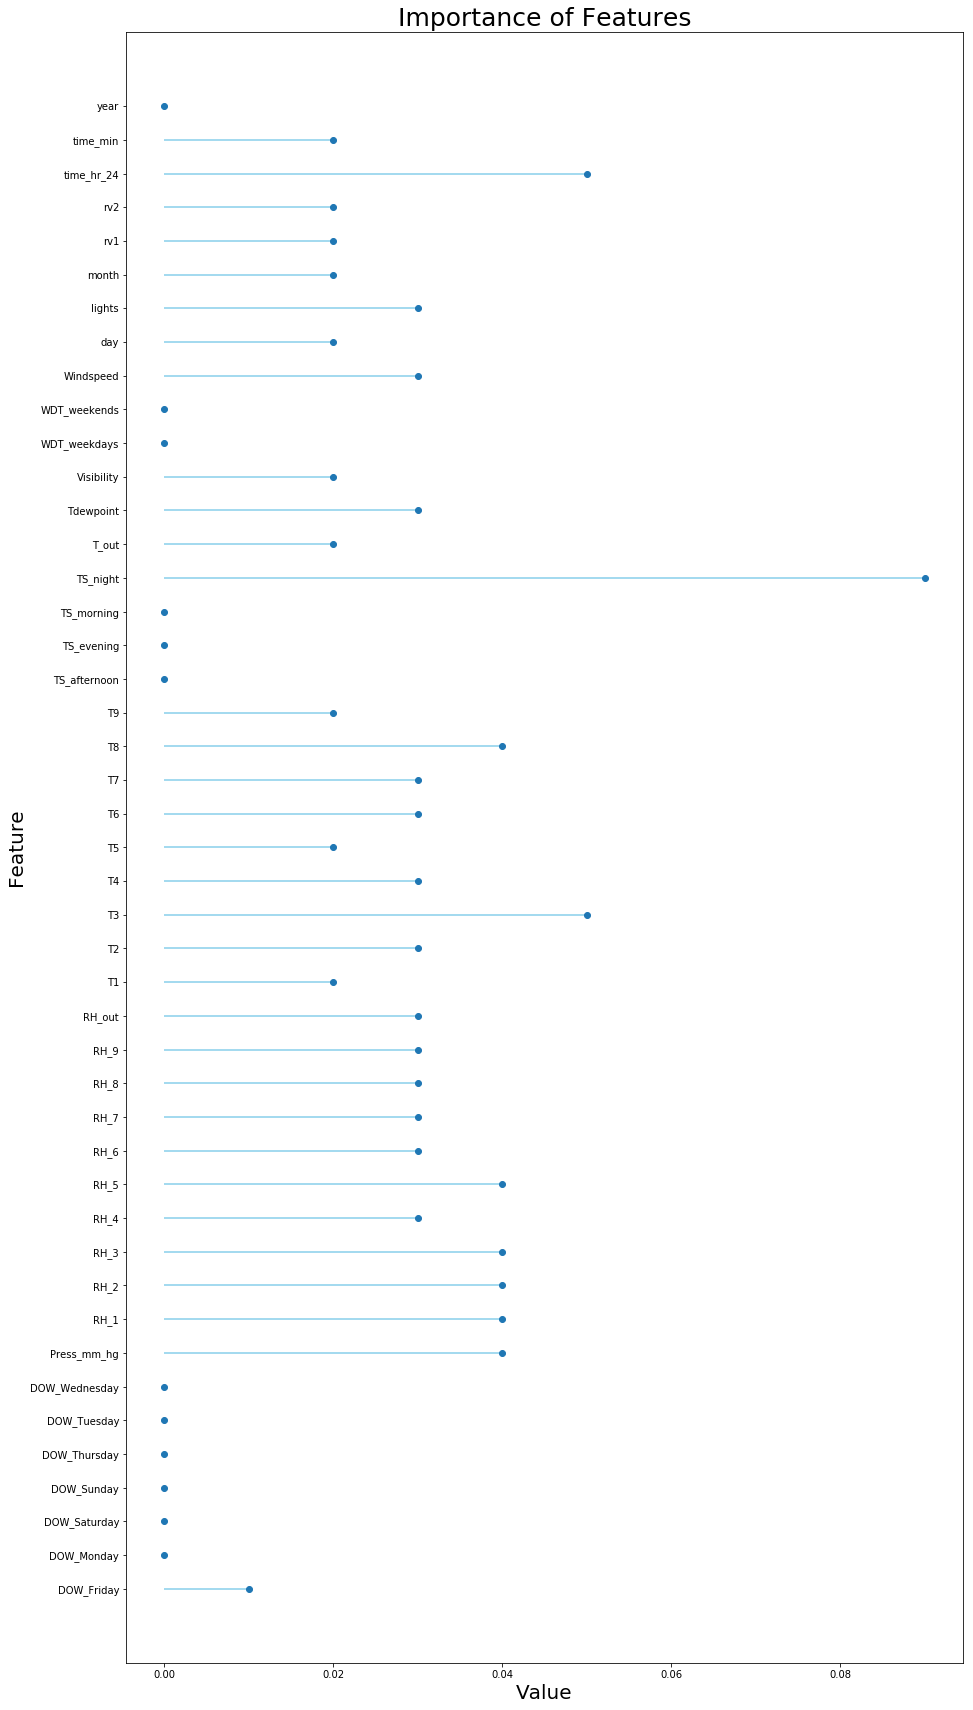

In [140]:

a=d['Feature']
plt.xlabel("Value" , fontsize=20)
plt.ylabel("Feature" , fontsize=20)
plt.legend()
plt.title("Importance of Features" , fontsize=25)
plt.hlines(y=a, xmin=0, xmax=d['Value'], color='skyblue')
plt.plot(d['Value'], a, "o")
plt.rcParams['figure.figsize'] = (15 , 3)
plt.show()
